In [40]:
#import libraries 

import pandas as pd
import scipy.io
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import timeit

# Load catch22 and tsfresh

In [18]:
import pandas as pd 

tsfresh = pd.read_csv(r'C:\Users\seren\Documents\oct\tsfresh_multi.csv')
catch = pd.read_csv(r'C:\Users\seren\Documents\oct\catch_multi.csv')

print('tsfresh multivariate dataset: ', tsfresh.shape)
print('catch22 multivariate dataset: ', catch.shape)

tsfresh_X = tsfresh.drop(['class'], axis = 1)
catch_X = catch.drop(['class'], axis = 1)

print('tsfresh multivariate dataset w/o class label: ', tsfresh_X.shape)
print('catch22 multivariate dataset w/o class label: ', catch_X.shape)

tsfresh multivariate dataset:  (88, 4675)
catch22 multivariate dataset:  (88, 133)
tsfresh multivariate dataset w/o class label:  (88, 4674)
catch22 multivariate dataset w/o class label:  (88, 132)


### Drop rows with nan values

In [19]:
df = pd.concat([tsfresh['class'],tsfresh_X, catch_X], axis = 1)
print('combined multivariate dataset w/ class label: ', df.shape)

combined multivariate dataset w/ class label:  (88, 4807)


In [20]:
#drop rows with nan
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

rows_with_NaN

,class,var4__variance_larger_than_standard_deviation,var4__has_duplicate_max,var4__has_duplicate_min,var4__has_duplicate,var4__sum_values,var4__abs_energy,var4__mean_abs_change,var4__mean_change,var4__mean_second_derivative_central,...,FC_LocalSimple_mean1_tauresrat_var6,DN_OutlierInclude_p_001_mdrmd_var6,DN_OutlierInclude_n_001_mdrmd_var6,SP_Summaries_welch_rect_area_5_1_var6,SB_BinaryStats_diff_longstretch0_var6,SB_MotifThree_quantile_hh_var6,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1_var6,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1_var6,SP_Summaries_welch_rect_centroid_var6,FC_LocalSimple_mean3_stderr_var6
38,3,0.0,1.0,1.0,1.0,-43.0,125.0,0.214286,0.071429,0.038462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,3,0.0,1.0,1.0,1.0,-38.0,100.0,0.571429,0.000000,-0.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = df.drop([38, 43]).reset_index(drop = True)

In [22]:
print('combined multivariate dataset w/ class label (nan removed): ', df.shape)
df.head()

combined multivariate dataset w/ class label (nan removed):  (86, 4807)


,class,var4__variance_larger_than_standard_deviation,var4__has_duplicate_max,var4__has_duplicate_min,var4__has_duplicate,var4__sum_values,var4__abs_energy,var4__mean_abs_change,var4__mean_change,var4__mean_second_derivative_central,...,FC_LocalSimple_mean1_tauresrat_var6,DN_OutlierInclude_p_001_mdrmd_var6,DN_OutlierInclude_n_001_mdrmd_var6,SP_Summaries_welch_rect_area_5_1_var6,SB_BinaryStats_diff_longstretch0_var6,SB_MotifThree_quantile_hh_var6,SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1_var6,SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1_var6,SP_Summaries_welch_rect_centroid_var6,FC_LocalSimple_mean3_stderr_var6
0,3,1.0,0.0,1.0,1.0,-60.0,344.0,3.214286,0.071429,-0.076923,...,1.000000,0.066667,0.266667,4.622232e-34,2.0,0.000000,0.0,0.0,2.356194,1.259719
1,3,1.0,0.0,0.0,1.0,-105.0,849.0,4.071429,-0.357143,0.000000,...,0.333333,0.133333,0.800000,8.217301e-34,2.0,0.754997,0.0,0.0,0.785398,1.121574
2,3,1.0,0.0,1.0,1.0,-107.0,823.0,2.857143,0.285714,-0.115385,...,1.000000,-0.066667,0.466667,0.000000e+00,2.0,0.509137,0.0,0.0,2.356194,1.388659
3,3,1.0,0.0,0.0,1.0,-143.0,1443.0,2.928571,0.357143,0.269231,...,0.500000,0.600000,0.066667,1.543027e-34,3.0,1.871160,0.0,0.0,1.178097,1.275250
4,3,1.0,0.0,1.0,1.0,-49.0,349.0,4.428571,-0.142857,0.000000,...,0.333333,-0.133333,0.866667,2.516548e-33,2.0,0.000000,0.0,0.0,0.785398,0.805076


In [36]:
y = df['class']
X = df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [27]:
from skfeature.utility import construct_W
from skfeature.function.similarity_based import lap_score

#Construct affinity matrix which is required by Laplacian Score:
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W.construct_W(X_train.to_numpy(), **kwargs_W)

#Compute and output the score of each feature
score = lap_score.lap_score(X_train.to_numpy(), W=W)
print(score)

[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
 1.11022302e-16 0.00000000e+00]


In [30]:
#Assign ranking to the score 
idx = lap_score.feature_ranking(score)
print(idx)
print('length: ', len(idx))

[4805 1707 1709 ... 2099 2402 3019]
length:  4806


In [37]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Part 1: 10% Interval

# 1% of Features 

In [150]:
num_fea = round(len(idx)*0.01)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

48


In [148]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.2541952	total: 2.94ms	remaining: 2.93s
1:	learn: 1.1629310	total: 4.52ms	remaining: 2.25s
2:	learn: 1.0774813	total: 6.33ms	remaining: 2.1s
3:	learn: 0.9559103	total: 8.32ms	remaining: 2.07s
4:	learn: 0.8772646	total: 10.2ms	remaining: 2.02s
5:	learn: 0.7864845	total: 12.1ms	remaining: 2.01s
6:	learn: 0.7078476	total: 13.8ms	remaining: 1.96s
7:	learn: 0.6817431	total: 15.8ms	remaining: 1.96s
8:	learn: 0.6145776	total: 17.5ms	remaining: 1.93s
9:	learn: 0.5699216	total: 19.1ms	remaining: 1.89s
10:	learn: 0.5291458	total: 20.7ms	remaining: 1.86s
11:	learn: 0.5131877	total: 22.6ms	remaining: 1.86s
12:	learn: 0.4741481	total: 24.3ms	remaining: 1.85s
13:	learn: 0.4529474	total: 26.2ms	remaining: 1.84s
14:	learn: 0.4263500	total: 28ms	remaining: 1.84s
15:	learn: 0.3879206	total: 29.9ms	remaining: 1.84s
16:	learn: 0.3516370	total: 32.2ms	remaining: 1.86s
17:	learn: 0.3322359	total: 33.9ms	remaining: 1.85s
18:	learn: 0.3195013	total: 35.5ms	remaining: 1.83s
19:	learn: 0.2920748	tota

Time:  2.9496626000000106
Error rate:  0.34285714285714286
Score:  0.6571428571428571


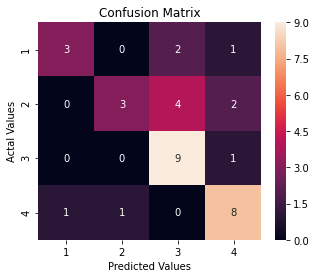

In [149]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 10% of Features 

In [187]:
num_fea = round(len(idx)*0.1)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

In [188]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9750899	total: 9.5ms	remaining: 9.49s
1:	learn: 0.7739566	total: 14.8ms	remaining: 7.37s
2:	learn: 0.5832950	total: 27.7ms	remaining: 9.22s
3:	learn: 0.4696905	total: 35.6ms	remaining: 8.87s
4:	learn: 0.3993528	total: 41.7ms	remaining: 8.29s
5:	learn: 0.3466836	total: 47.1ms	remaining: 7.8s
6:	learn: 0.3065214	total: 51.5ms	remaining: 7.31s
7:	learn: 0.2593392	total: 63.5ms	remaining: 7.87s
8:	learn: 0.2336174	total: 72.5ms	remaining: 7.99s
9:	learn: 0.1928649	total: 79.6ms	remaining: 7.88s
10:	learn: 0.1688879	total: 85.8ms	remaining: 7.71s
11:	learn: 0.1394812	total: 91.5ms	remaining: 7.53s
12:	learn: 0.1125988	total: 96.5ms	remaining: 7.33s
13:	learn: 0.1003549	total: 102ms	remaining: 7.15s
14:	learn: 0.0869883	total: 109ms	remaining: 7.14s
15:	learn: 0.0775624	total: 117ms	remaining: 7.17s
16:	learn: 0.0680467	total: 122ms	remaining: 7.08s
17:	learn: 0.0623409	total: 129ms	remaining: 7.05s
18:	learn: 0.0551260	total: 135ms	remaining: 6.97s
19:	learn: 0.0499816	total: 14

Time:  7.87941359999968
Error rate:  0.05714285714285716
Score:  0.9428571428571428


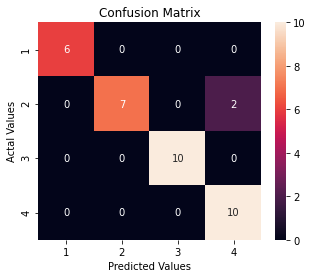

In [189]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 20%  of Features 

In [135]:
num_fea = round(4806*0.2)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

961


In [136]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9562966	total: 38.3ms	remaining: 38.2s
1:	learn: 0.8215193	total: 58ms	remaining: 28.9s
2:	learn: 0.5668784	total: 75.9ms	remaining: 25.2s
3:	learn: 0.5214006	total: 96.5ms	remaining: 24s
4:	learn: 0.4292007	total: 117ms	remaining: 23.2s
5:	learn: 0.3558689	total: 141ms	remaining: 23.4s
6:	learn: 0.2809937	total: 157ms	remaining: 22.3s
7:	learn: 0.2254523	total: 174ms	remaining: 21.6s
8:	learn: 0.1927067	total: 191ms	remaining: 21.1s
9:	learn: 0.1752623	total: 209ms	remaining: 20.7s
10:	learn: 0.1451776	total: 227ms	remaining: 20.4s
11:	learn: 0.1207975	total: 245ms	remaining: 20.2s
12:	learn: 0.1066985	total: 262ms	remaining: 19.9s
13:	learn: 0.0877015	total: 278ms	remaining: 19.6s
14:	learn: 0.0775599	total: 294ms	remaining: 19.3s
15:	learn: 0.0651537	total: 311ms	remaining: 19.1s
16:	learn: 0.0568470	total: 330ms	remaining: 19.1s
17:	learn: 0.0498869	total: 354ms	remaining: 19.3s
18:	learn: 0.0444664	total: 378ms	remaining: 19.5s
19:	learn: 0.0393558	total: 398ms	remaini

Time:  20.748540099999445
Error rate:  0.02857142857142858
Score:  0.9714285714285714


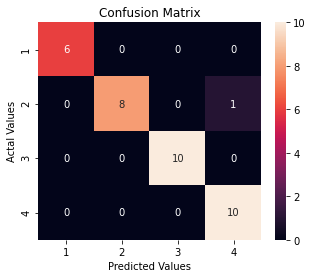

In [137]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 30% of Features 

In [138]:
num_fea = round(4806*0.3)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

1442


In [139]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.0233197	total: 59.6ms	remaining: 59.6s
1:	learn: 0.7820877	total: 101ms	remaining: 50.3s
2:	learn: 0.6258330	total: 136ms	remaining: 45.3s
3:	learn: 0.4877653	total: 160ms	remaining: 40s
4:	learn: 0.4457785	total: 185ms	remaining: 36.8s
5:	learn: 0.3708965	total: 219ms	remaining: 36.3s
6:	learn: 0.3219110	total: 247ms	remaining: 35s
7:	learn: 0.2963991	total: 274ms	remaining: 33.9s
8:	learn: 0.2317782	total: 312ms	remaining: 34.4s
9:	learn: 0.1924602	total: 349ms	remaining: 34.5s
10:	learn: 0.1559562	total: 387ms	remaining: 34.8s
11:	learn: 0.1311368	total: 420ms	remaining: 34.6s
12:	learn: 0.1119774	total: 453ms	remaining: 34.4s
13:	learn: 0.0932492	total: 492ms	remaining: 34.6s
14:	learn: 0.0782502	total: 518ms	remaining: 34s
15:	learn: 0.0684882	total: 551ms	remaining: 33.9s
16:	learn: 0.0595036	total: 591ms	remaining: 34.2s
17:	learn: 0.0532328	total: 620ms	remaining: 33.8s
18:	learn: 0.0467042	total: 653ms	remaining: 33.7s
19:	learn: 0.0404710	total: 688ms	remaining: 3

Time:  30.886337099998855
Error rate:  0.05714285714285716
Score:  0.9428571428571428


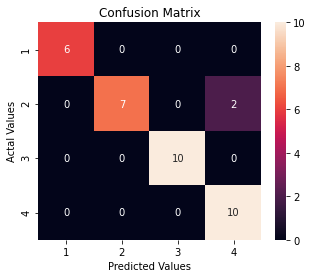

In [140]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# 40%  of Features 

In [158]:
num_fea = round(4806*0.4)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

1922


In [159]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9293083	total: 59.9ms	remaining: 59.8s
1:	learn: 0.6089780	total: 96.2ms	remaining: 48s
2:	learn: 0.4616160	total: 133ms	remaining: 44.3s
3:	learn: 0.3609990	total: 174ms	remaining: 43.4s
4:	learn: 0.2809138	total: 209ms	remaining: 41.6s
5:	learn: 0.2331634	total: 241ms	remaining: 40s
6:	learn: 0.2019598	total: 289ms	remaining: 41s
7:	learn: 0.1660620	total: 332ms	remaining: 41.2s
8:	learn: 0.1454503	total: 367ms	remaining: 40.4s
9:	learn: 0.1306029	total: 401ms	remaining: 39.7s
10:	learn: 0.1127326	total: 439ms	remaining: 39.5s
11:	learn: 0.1033706	total: 473ms	remaining: 39s
12:	learn: 0.0887980	total: 514ms	remaining: 39s
13:	learn: 0.0799707	total: 550ms	remaining: 38.7s
14:	learn: 0.0688131	total: 586ms	remaining: 38.5s
15:	learn: 0.0620618	total: 623ms	remaining: 38.3s
16:	learn: 0.0540726	total: 668ms	remaining: 38.6s
17:	learn: 0.0479207	total: 712ms	remaining: 38.8s
18:	learn: 0.0453454	total: 753ms	remaining: 38.9s
19:	learn: 0.0403313	total: 793ms	remaining: 38.9

Time:  41.269105400000626
Error rate:  0.02857142857142858
Score:  0.9714285714285714


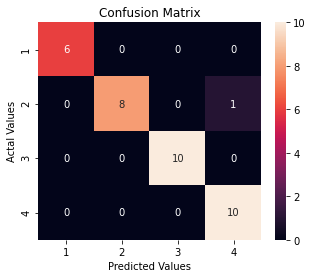

In [160]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 50% of Features 

In [144]:
num_fea = round(4806*0.5)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

2403


In [145]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9014007	total: 87.9ms	remaining: 1m 27s
1:	learn: 0.7351501	total: 164ms	remaining: 1m 21s
2:	learn: 0.6277424	total: 219ms	remaining: 1m 12s
3:	learn: 0.5057386	total: 266ms	remaining: 1m 6s
4:	learn: 0.3805487	total: 312ms	remaining: 1m 2s
5:	learn: 0.3149176	total: 356ms	remaining: 58.9s
6:	learn: 0.2578406	total: 393ms	remaining: 55.7s
7:	learn: 0.2056938	total: 430ms	remaining: 53.4s
8:	learn: 0.1838135	total: 470ms	remaining: 51.8s
9:	learn: 0.1550256	total: 516ms	remaining: 51.1s
10:	learn: 0.1317543	total: 563ms	remaining: 50.6s
11:	learn: 0.1187426	total: 606ms	remaining: 49.9s
12:	learn: 0.1100349	total: 648ms	remaining: 49.2s
13:	learn: 0.1017649	total: 699ms	remaining: 49.2s
14:	learn: 0.0860480	total: 750ms	remaining: 49.3s
15:	learn: 0.0756175	total: 796ms	remaining: 48.9s
16:	learn: 0.0673170	total: 843ms	remaining: 48.8s
17:	learn: 0.0600981	total: 883ms	remaining: 48.2s
18:	learn: 0.0555744	total: 928ms	remaining: 47.9s
19:	learn: 0.0490033	total: 973ms	rem

Time:  47.401713900000686
Error rate:  0.05714285714285716
Score:  0.9428571428571428


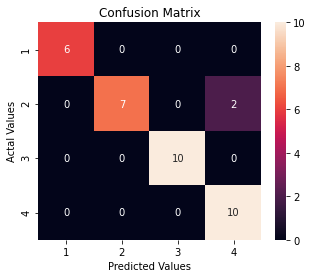

In [146]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 70% of Features 

In [151]:
num_fea = round(4806*0.7)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

3364


In [152]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9014007	total: 79.1ms	remaining: 1m 19s
1:	learn: 0.7351501	total: 128ms	remaining: 1m 3s
2:	learn: 0.6277424	total: 179ms	remaining: 59.6s
3:	learn: 0.5057386	total: 231ms	remaining: 57.5s
4:	learn: 0.3805487	total: 271ms	remaining: 54s
5:	learn: 0.3149176	total: 318ms	remaining: 52.7s
6:	learn: 0.2578406	total: 360ms	remaining: 51.1s
7:	learn: 0.2056938	total: 405ms	remaining: 50.3s
8:	learn: 0.1838135	total: 446ms	remaining: 49.2s
9:	learn: 0.1550256	total: 499ms	remaining: 49.4s
10:	learn: 0.1317543	total: 541ms	remaining: 48.6s
11:	learn: 0.1187426	total: 588ms	remaining: 48.4s
12:	learn: 0.1100349	total: 633ms	remaining: 48s
13:	learn: 0.1017649	total: 677ms	remaining: 47.7s
14:	learn: 0.0860480	total: 719ms	remaining: 47.2s
15:	learn: 0.0756175	total: 760ms	remaining: 46.7s
16:	learn: 0.0673170	total: 805ms	remaining: 46.5s
17:	learn: 0.0600981	total: 845ms	remaining: 46.1s
18:	learn: 0.0555744	total: 896ms	remaining: 46.2s
19:	learn: 0.0490033	total: 941ms	remaining

Time:  46.724316499999986
Error rate:  0.05714285714285716
Score:  0.9428571428571428


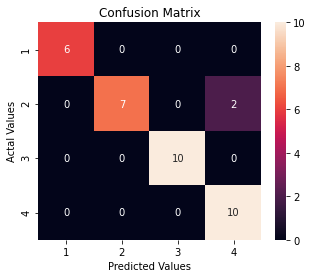

In [153]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 90%  of Features 

In [155]:
num_fea = round(4806*0.9)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

4325


In [156]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9014007	total: 70.5ms	remaining: 1m 10s
1:	learn: 0.7351501	total: 112ms	remaining: 55.8s
2:	learn: 0.6277424	total: 155ms	remaining: 51.7s
3:	learn: 0.5057386	total: 191ms	remaining: 47.7s
4:	learn: 0.3805487	total: 227ms	remaining: 45.2s
5:	learn: 0.3149176	total: 271ms	remaining: 45s
6:	learn: 0.2578406	total: 315ms	remaining: 44.7s
7:	learn: 0.2056938	total: 355ms	remaining: 44s
8:	learn: 0.1838135	total: 397ms	remaining: 43.7s
9:	learn: 0.1550256	total: 439ms	remaining: 43.4s
10:	learn: 0.1317543	total: 487ms	remaining: 43.7s
11:	learn: 0.1187426	total: 540ms	remaining: 44.5s
12:	learn: 0.1100349	total: 589ms	remaining: 44.7s
13:	learn: 0.1017649	total: 633ms	remaining: 44.6s
14:	learn: 0.0860480	total: 678ms	remaining: 44.5s
15:	learn: 0.0756175	total: 729ms	remaining: 44.8s
16:	learn: 0.0673170	total: 778ms	remaining: 45s
17:	learn: 0.0600981	total: 824ms	remaining: 44.9s
18:	learn: 0.0555744	total: 869ms	remaining: 44.9s
19:	learn: 0.0490033	total: 919ms	remaining: 

Time:  46.93819480000093
Error rate:  0.05714285714285716
Score:  0.9428571428571428


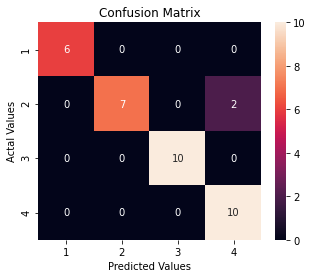

In [157]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Part 2: 1% interval

## 2%  of Features 

In [163]:
num_fea = round(4806*0.02)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

96


In [164]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.2535510	total: 1.94ms	remaining: 1.93s
1:	learn: 1.1144300	total: 3.26ms	remaining: 1.63s
2:	learn: 0.9238544	total: 4.61ms	remaining: 1.53s
3:	learn: 0.8041376	total: 6.28ms	remaining: 1.56s
4:	learn: 0.6476753	total: 7.83ms	remaining: 1.56s
5:	learn: 0.5659720	total: 10.1ms	remaining: 1.67s
6:	learn: 0.4754477	total: 11.9ms	remaining: 1.69s
7:	learn: 0.4608482	total: 16.5ms	remaining: 2.05s
8:	learn: 0.3749456	total: 20.1ms	remaining: 2.21s
9:	learn: 0.3156432	total: 23ms	remaining: 2.28s
10:	learn: 0.2954321	total: 25.4ms	remaining: 2.29s
11:	learn: 0.2799746	total: 27.4ms	remaining: 2.25s
12:	learn: 0.2465990	total: 29.3ms	remaining: 2.22s
13:	learn: 0.2032042	total: 31ms	remaining: 2.18s
14:	learn: 0.1736957	total: 33ms	remaining: 2.16s
15:	learn: 0.1533151	total: 34.7ms	remaining: 2.13s
16:	learn: 0.1261302	total: 36.2ms	remaining: 2.1s
17:	learn: 0.1081012	total: 37.6ms	remaining: 2.05s
18:	learn: 0.0963448	total: 38.9ms	remaining: 2.01s
19:	learn: 0.0856960	total: 4

Time:  2.424030899999707
Error rate:  0.1428571428571429
Score:  0.8571428571428571


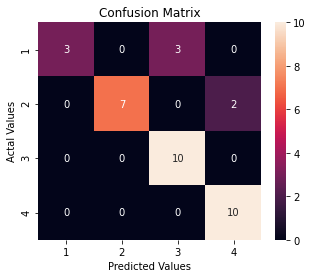

In [165]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 3% of Features 

In [166]:
num_fea = round(4806*0.03)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

144


In [167]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.1773684	total: 3.55ms	remaining: 3.54s
1:	learn: 0.9322286	total: 5.72ms	remaining: 2.85s
2:	learn: 0.7736144	total: 7.58ms	remaining: 2.52s
3:	learn: 0.7249290	total: 9.33ms	remaining: 2.32s
4:	learn: 0.6021201	total: 11.9ms	remaining: 2.38s
5:	learn: 0.5056253	total: 15.5ms	remaining: 2.56s
6:	learn: 0.4308757	total: 22.2ms	remaining: 3.15s
7:	learn: 0.3526753	total: 26.9ms	remaining: 3.33s
8:	learn: 0.2822058	total: 31.1ms	remaining: 3.42s
9:	learn: 0.2484717	total: 34.5ms	remaining: 3.42s
10:	learn: 0.2298570	total: 37.3ms	remaining: 3.35s
11:	learn: 0.2151785	total: 39.8ms	remaining: 3.28s
12:	learn: 0.1954362	total: 42.1ms	remaining: 3.2s
13:	learn: 0.1549127	total: 44.2ms	remaining: 3.12s
14:	learn: 0.1286712	total: 46.5ms	remaining: 3.05s
15:	learn: 0.1150517	total: 48.4ms	remaining: 2.98s
16:	learn: 0.1001825	total: 50.2ms	remaining: 2.9s
17:	learn: 0.0859635	total: 52ms	remaining: 2.84s
18:	learn: 0.0768426	total: 53.6ms	remaining: 2.77s
19:	learn: 0.0705917	total

Time:  2.668542100000195
Error rate:  0.1428571428571429
Score:  0.8571428571428571


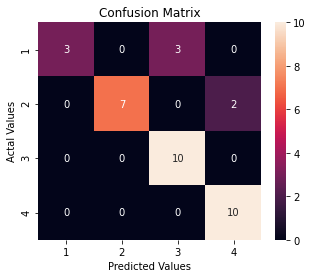

In [168]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 4%  of Features 

In [169]:
num_fea = round(4806*0.04)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

192


In [170]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.1033149	total: 3.99ms	remaining: 3.98s
1:	learn: 0.8692779	total: 7.01ms	remaining: 3.5s
2:	learn: 0.6683615	total: 10.1ms	remaining: 3.37s
3:	learn: 0.5585967	total: 13.2ms	remaining: 3.29s
4:	learn: 0.4417821	total: 16.5ms	remaining: 3.29s
5:	learn: 0.4093857	total: 19.6ms	remaining: 3.25s
6:	learn: 0.3091555	total: 22.9ms	remaining: 3.25s
7:	learn: 0.2798475	total: 26.1ms	remaining: 3.24s
8:	learn: 0.2507126	total: 29.8ms	remaining: 3.29s
9:	learn: 0.2264743	total: 33.4ms	remaining: 3.3s
10:	learn: 0.1981177	total: 37.1ms	remaining: 3.33s
11:	learn: 0.1731238	total: 40ms	remaining: 3.29s
12:	learn: 0.1540403	total: 43ms	remaining: 3.26s
13:	learn: 0.1386139	total: 46.8ms	remaining: 3.3s
14:	learn: 0.1166684	total: 49.9ms	remaining: 3.27s
15:	learn: 0.0997985	total: 52.5ms	remaining: 3.23s
16:	learn: 0.0848356	total: 55.4ms	remaining: 3.2s
17:	learn: 0.0712537	total: 58.3ms	remaining: 3.18s
18:	learn: 0.0640843	total: 61.4ms	remaining: 3.17s
19:	learn: 0.0588690	total: 64

Time:  3.551850400001058
Error rate:  0.08571428571428574
Score:  0.9142857142857143


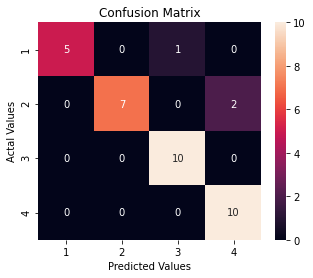

In [171]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 5%  of Features 

In [172]:
num_fea = round(4806*0.05)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

240


In [173]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.0130403	total: 5.27ms	remaining: 5.26s
1:	learn: 0.8197715	total: 10.4ms	remaining: 5.17s
2:	learn: 0.6438547	total: 13.9ms	remaining: 4.62s
3:	learn: 0.4952461	total: 17.7ms	remaining: 4.4s
4:	learn: 0.4369694	total: 21.1ms	remaining: 4.19s
5:	learn: 0.3299897	total: 24.9ms	remaining: 4.13s
6:	learn: 0.3088568	total: 28.7ms	remaining: 4.06s
7:	learn: 0.2592547	total: 32.1ms	remaining: 3.98s
8:	learn: 0.2295990	total: 35.8ms	remaining: 3.94s
9:	learn: 0.1967670	total: 39.5ms	remaining: 3.9s
10:	learn: 0.1702558	total: 43ms	remaining: 3.86s
11:	learn: 0.1486017	total: 46.5ms	remaining: 3.83s
12:	learn: 0.1267293	total: 49.9ms	remaining: 3.79s
13:	learn: 0.1089288	total: 53.5ms	remaining: 3.77s
14:	learn: 0.0943409	total: 57.1ms	remaining: 3.75s
15:	learn: 0.0826743	total: 60.5ms	remaining: 3.72s
16:	learn: 0.0754577	total: 64ms	remaining: 3.7s
17:	learn: 0.0673987	total: 67.4ms	remaining: 3.68s
18:	learn: 0.0629077	total: 70.7ms	remaining: 3.65s
19:	learn: 0.0566438	total: 7

Time:  4.470695400001205
Error rate:  0.11428571428571432
Score:  0.8857142857142857


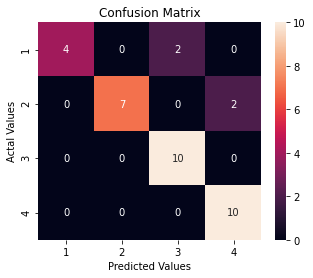

In [174]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 6%  of Features 

In [175]:
num_fea = round(4806*0.06)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

288


In [176]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 1.0736194	total: 6.78ms	remaining: 6.77s
1:	learn: 0.8531268	total: 11.3ms	remaining: 5.62s
2:	learn: 0.6368771	total: 15.3ms	remaining: 5.1s
3:	learn: 0.5067199	total: 19.9ms	remaining: 4.95s
4:	learn: 0.4051302	total: 24ms	remaining: 4.78s
5:	learn: 0.3642658	total: 28.5ms	remaining: 4.72s
6:	learn: 0.3165599	total: 32.7ms	remaining: 4.64s
7:	learn: 0.2443288	total: 36.8ms	remaining: 4.57s
8:	learn: 0.2155387	total: 41.1ms	remaining: 4.53s
9:	learn: 0.1858233	total: 45.2ms	remaining: 4.47s
10:	learn: 0.1662007	total: 49.4ms	remaining: 4.45s
11:	learn: 0.1384993	total: 53.7ms	remaining: 4.42s
12:	learn: 0.1188171	total: 57.8ms	remaining: 4.39s
13:	learn: 0.1041665	total: 61.8ms	remaining: 4.35s
14:	learn: 0.0912809	total: 65.9ms	remaining: 4.33s
15:	learn: 0.0832735	total: 70ms	remaining: 4.31s
16:	learn: 0.0762562	total: 74.1ms	remaining: 4.29s
17:	learn: 0.0656993	total: 78.3ms	remaining: 4.27s
18:	learn: 0.0573757	total: 82.3ms	remaining: 4.25s
19:	learn: 0.0523301	total:

Time:  5.7167976000000635
Error rate:  0.05714285714285716
Score:  0.9428571428571428


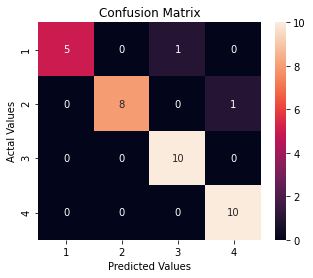

In [177]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 7%  of Features 

In [178]:
num_fea = round(4806*0.07)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

336


In [179]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9234997	total: 9.79ms	remaining: 9.78s
1:	learn: 0.7227656	total: 15.1ms	remaining: 7.55s
2:	learn: 0.5205295	total: 20.9ms	remaining: 6.94s
3:	learn: 0.4396562	total: 26.7ms	remaining: 6.66s
4:	learn: 0.3499217	total: 33.5ms	remaining: 6.67s
5:	learn: 0.2829140	total: 39.3ms	remaining: 6.51s
6:	learn: 0.2450216	total: 44.6ms	remaining: 6.33s
7:	learn: 0.2097561	total: 50.7ms	remaining: 6.29s
8:	learn: 0.1764642	total: 56.5ms	remaining: 6.22s
9:	learn: 0.1636014	total: 62.5ms	remaining: 6.19s
10:	learn: 0.1393545	total: 68.8ms	remaining: 6.18s
11:	learn: 0.1243997	total: 74.4ms	remaining: 6.12s
12:	learn: 0.1134766	total: 80.2ms	remaining: 6.09s
13:	learn: 0.0965773	total: 85.7ms	remaining: 6.03s
14:	learn: 0.0897356	total: 91.2ms	remaining: 5.99s
15:	learn: 0.0777607	total: 96.6ms	remaining: 5.94s
16:	learn: 0.0691018	total: 102ms	remaining: 5.91s
17:	learn: 0.0601981	total: 107ms	remaining: 5.86s
18:	learn: 0.0543781	total: 113ms	remaining: 5.81s
19:	learn: 0.0490969	tota

Time:  6.833828099999664
Error rate:  0.08571428571428574
Score:  0.9142857142857143


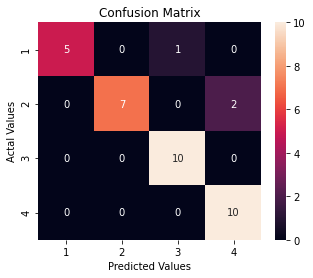

In [180]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 8%  of Features 

In [181]:
num_fea = round(4806*0.08)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

384


In [182]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.8973138	total: 10.8ms	remaining: 10.8s
1:	learn: 0.6763956	total: 18.1ms	remaining: 9.05s
2:	learn: 0.5403991	total: 25.2ms	remaining: 8.36s
3:	learn: 0.4689739	total: 32.1ms	remaining: 8s
4:	learn: 0.3794270	total: 38.6ms	remaining: 7.68s
5:	learn: 0.3228502	total: 45.5ms	remaining: 7.54s
6:	learn: 0.2423036	total: 52.6ms	remaining: 7.46s
7:	learn: 0.2049149	total: 58.6ms	remaining: 7.27s
8:	learn: 0.1809123	total: 64.7ms	remaining: 7.13s
9:	learn: 0.1617877	total: 71ms	remaining: 7.03s
10:	learn: 0.1385313	total: 77.3ms	remaining: 6.95s
11:	learn: 0.1225142	total: 83.8ms	remaining: 6.9s
12:	learn: 0.1124793	total: 90.4ms	remaining: 6.86s
13:	learn: 0.0999890	total: 97.3ms	remaining: 6.85s
14:	learn: 0.0868764	total: 104ms	remaining: 6.83s
15:	learn: 0.0820207	total: 111ms	remaining: 6.82s
16:	learn: 0.0721920	total: 117ms	remaining: 6.79s
17:	learn: 0.0638131	total: 125ms	remaining: 6.82s
18:	learn: 0.0584276	total: 133ms	remaining: 6.85s
19:	learn: 0.0521922	total: 140ms

Time:  8.029904400000305
Error rate:  0.08571428571428574
Score:  0.9142857142857143


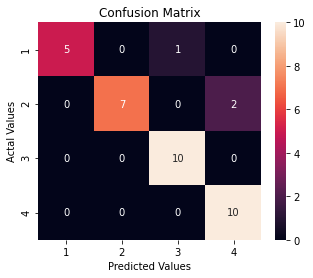

In [183]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 9%  of Features 

In [184]:
num_fea = round(4806*0.09)
print(num_fea)
X_train_filtered = X_train[:, idx[0:num_fea]]
X_test_filtered  = X_test[:, idx[0:num_fea]]

433


In [185]:
start = timeit.default_timer()

model = CatBoostClassifier(
    learning_rate=0.35,
    l2_leaf_reg=1,
    depth=3,
    loss_function='MultiClass',
)


model.fit(X_train_filtered, y_train)
y_pred = model.predict(X_test_filtered)
score = accuracy_score(y_test, y_pred)
error_rate = 1-score

stop = timeit.default_timer()

0:	learn: 0.9520420	total: 9.86ms	remaining: 9.85s
1:	learn: 0.7149389	total: 16.1ms	remaining: 8.03s
2:	learn: 0.5438095	total: 22.2ms	remaining: 7.39s
3:	learn: 0.4431611	total: 29.1ms	remaining: 7.26s
4:	learn: 0.3403201	total: 36.5ms	remaining: 7.26s
5:	learn: 0.2923049	total: 42.9ms	remaining: 7.11s
6:	learn: 0.2439861	total: 49.5ms	remaining: 7.02s
7:	learn: 0.2107817	total: 56.2ms	remaining: 6.96s
8:	learn: 0.1636081	total: 62.4ms	remaining: 6.87s
9:	learn: 0.1421229	total: 68.8ms	remaining: 6.81s
10:	learn: 0.1241791	total: 75.5ms	remaining: 6.78s
11:	learn: 0.1061295	total: 81.8ms	remaining: 6.73s
12:	learn: 0.0929948	total: 88.1ms	remaining: 6.69s
13:	learn: 0.0799933	total: 94.5ms	remaining: 6.65s
14:	learn: 0.0737432	total: 101ms	remaining: 6.63s
15:	learn: 0.0632468	total: 108ms	remaining: 6.62s
16:	learn: 0.0572734	total: 114ms	remaining: 6.61s
17:	learn: 0.0506063	total: 122ms	remaining: 6.65s
18:	learn: 0.0453776	total: 131ms	remaining: 6.75s
19:	learn: 0.0418623	total:

Time:  8.620716199999151
Error rate:  0.05714285714285716
Score:  0.9428571428571428


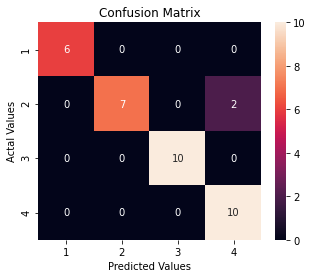

In [186]:
print('Time: ', stop - start) 
print('Error rate: ', error_rate)
print('Score: ', score)

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4'], 
                     columns = ['1','2','3','4'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()